In [1]:
from matrix import build_matrix
from matrix import integer_inequality
import numpy as np
from scipy.sparse import coo_matrix
from matplotlib import pyplot as plt
import scipy.sparse
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import eigs

# make the d function

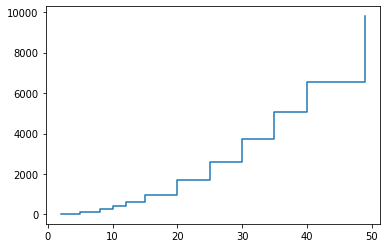

In [7]:
x = integer_inequality(np.array([100, 100, 1]))
x.all_numbers(49,d_given = [2,5,8,10,12,15,20,25, 30, 35, 40, 49])
x.save_to_json('2d_100_100_1')

# build the matrix

In [4]:
z = build_matrix('1d_ring_1000', np.array([1000,1,1]), 5)
z.tuples = build_matrix.fast_all_indices(z.D_0, z.N)
#z.all_indices()
#z.one_int_index_tuples()
#z.Laplacian_0()
#z.random_rewiring(0.5)
#z.Adjacency_0()
#z.Laplacian_0()

FileNotFoundError: [Errno 2] No such file or directory: './d_functions/1d_ring_1000.json'

In [14]:
q = 0.01
r_0 = 10
z = build_matrix('2d_100_100_1', np.array([100, 100, 1]), r_0)
print(z.D_0)
z.tuples = build_matrix.fast_all_indices(np.array(z.D_0), z.N)
z.one_int_index_tuples_and_adjacency()
z.Laplacian_0()

#z.all_indices()

(array([3]),)
[[-10, -10, 0], [-10, -9, 0], [-10, -8, 0], [-10, -7, 0], [-10, -6, 0], [-10, -5, 0], [-10, -4, 0], [-10, -3, 0], [-10, -2, 0], [-10, -1, 0], [-10, 0, 0], [-10, 1, 0], [-10, 2, 0], [-10, 3, 0], [-10, 4, 0], [-10, 5, 0], [-10, 6, 0], [-10, 7, 0], [-10, 8, 0], [-10, 9, 0], [-10, 10, 0], [-9, -10, 0], [-9, -9, 0], [-9, -8, 0], [-9, -7, 0], [-9, -6, 0], [-9, -5, 0], [-9, -4, 0], [-9, -3, 0], [-9, -2, 0], [-9, -1, 0], [-9, 0, 0], [-9, 1, 0], [-9, 2, 0], [-9, 3, 0], [-9, 4, 0], [-9, 5, 0], [-9, 6, 0], [-9, 7, 0], [-9, 8, 0], [-9, 9, 0], [-9, 10, 0], [-8, -10, 0], [-8, -9, 0], [-8, -8, 0], [-8, -7, 0], [-8, -6, 0], [-8, -5, 0], [-8, -4, 0], [-8, -3, 0], [-8, -2, 0], [-8, -1, 0], [-8, 0, 0], [-8, 1, 0], [-8, 2, 0], [-8, 3, 0], [-8, 4, 0], [-8, 5, 0], [-8, 6, 0], [-8, 7, 0], [-8, 8, 0], [-8, 9, 0], [-8, 10, 0], [-7, -10, 0], [-7, -9, 0], [-7, -8, 0], [-7, -7, 0], [-7, -6, 0], [-7, -5, 0], [-7, -4, 0], [-7, -3, 0], [-7, -2, 0], [-7, -1, 0], [-7, 0, 0], [-7, 1, 0], [-7, 2, 0], [-7, 

In [18]:
L_rnd = build_matrix.fast_rewiring(z.L_0, z.r_0, 1, z.N_tot)

In [4]:
z.Laplacian_0()

In [3]:
print(z.L_0.diagonal())

[-6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6.]


In [47]:
print(z.ps, z.qs, z.M, len(z.ps))

[ 8  1  7  3  3  5  4 11  6 10  6  2  4  7  7  0  4  1  1  0  3  5  1 12
  8  1  0  9] [10 11 15 15  4  7 13 15 10 15  8  6  6  9 13  4  8  8  5 13  9  8 14 15
 15 13 10 13] 28 28


In [41]:
z.random_rewiring(0.05)

In [21]:
print(z.L_rnd.toarray())

[[-21.   1.   1.   1.   0.   1.   1.   1.   1.   1.   0.   1.   1.   1.
    1.   1.   1.   1.   1.   1.   0.   1.   1.   1.   1.]
 [  1. -18.   1.   1.   1.   0.   1.   1.   0.   1.   1.   1.   1.   0.
    1.   1.   1.   1.   1.   0.   1.   1.   0.   1.   0.]
 [  1.   1. -18.   0.   1.   0.   1.   1.   0.   1.   1.   1.   1.   0.
    0.   1.   1.   1.   1.   1.   1.   1.   0.   1.   1.]
 [  1.   1.   0. -17.   1.   1.   1.   0.   1.   1.   0.   1.   0.   1.
    1.   1.   0.   0.   1.   1.   1.   1.   1.   1.   0.]
 [  0.   1.   1.   1. -20.   1.   0.   1.   1.   1.   0.   1.   1.   1.
    1.   1.   1.   1.   0.   1.   1.   1.   1.   1.   1.]
 [  1.   0.   0.   1.   1. -14.   1.   1.   0.   0.   0.   0.   0.   1.
    1.   1.   1.   0.   1.   1.   1.   0.   1.   0.   1.]
 [  1.   1.   1.   1.   0.   1. -19.   1.   1.   1.   1.   1.   0.   1.
    1.   1.   1.   0.   1.   1.   1.   0.   0.   1.   1.]
 [  1.   1.   1.   0.   1.   1.   1. -20.   1.   1.   1.   1.   1.   1.
    0.   1.   1.  

In [38]:
print(np.where((z.L_0.toarray()+np.tril(np.ones((16,16))))==0))

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
        7,  7,  7,  7,  7,  8,  9,  9,  9,  9,  9, 10, 10, 11, 11, 11, 12,
       12, 12, 13, 13], dtype=int64), array([ 2,  4,  5,  7,  8,  9, 10, 11, 15,  5,  6,  7,  8,  9, 11, 13,  3,
        6,  7,  8,  9, 10, 13,  4,  5,  7,  9, 10, 11, 13, 15,  5,  6,  9,
       10, 11, 12, 13, 14,  7, 10, 11, 12, 14, 15,  8, 12, 14, 15,  8,  9,
       11, 12, 13, 14, 15, 10, 11, 12, 13, 14, 15, 11, 15, 12, 13, 15, 13,
       14, 15, 14, 15], dtype=int64))


In [20]:
print([np.sum(z.L_0[:,k])for k in range(16)])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [59]:
z.L_0[[1,1,1],[1,1,1]] += [1,1,1]

In [5]:
print(np.where(z.L_0.toarray()+np.tril(np.ones((16,16)))==0))

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,
        3,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  6,  6,
        6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  8,  8,  8,  9,  9,  9, 10,
       10, 11, 11, 12, 13], dtype=int64), array([ 2,  5,  6,  8,  9, 10, 11, 12, 14, 15,  3,  6,  7,  8,  9, 10, 11,
       12, 15,  4,  7,  8,  9, 10, 11, 12, 13,  4,  5,  8,  9, 10, 11, 13,
       14,  6,  9, 10, 12, 13, 14, 15,  7, 10, 11, 12, 13, 14, 15,  8, 11,
       12, 13, 14, 15,  8,  9, 12, 13, 14, 15, 10, 13, 14, 11, 14, 15, 12,
       15, 12, 13, 14, 15], dtype=int64))


In [64]:
a = coo_matrix(([-1,-1,1],([1,1,2],[1,1,1])), shape=(3,3))
print(a.toarray())

[[ 0  0  0]
 [ 0 -2  0]
 [ 0  1  0]]


In [34]:
print(len(y[0]))

7184133


In [8]:
from matplotlib import pyplot as plt


In [59]:
%matplotlib qt
plt.imshow(z.L_0.toarray(), vmin=-1, vmax=1)
plt.show()

In [13]:
z.save_to_json('Laplacian_2d_torus_hexagonal_q=0.05', thing_to_dump)

In [12]:
thing_to_dump = z.L_0.toarray().tolist()

In [2]:
#scipy.sparse.save_npz('./matrices/Laplacian_2d_torus_hexagonal_q=0.05.npz', z.L_0)
sparse_matrix = scipy.sparse.load_npz('./matrices/Laplacian_2d_torus_hexagonal_q=0.05.npz')

In [46]:
eigenvalues, eigenvectors = eigs(z.L_rnd+20*scipy.sparse.identity(25), k=8, which='LM')

In [47]:
print(np.sort(eigenvalues-20), eigenvectors)

[-2.30194106e+01+0.j -1.70446400e+01+0.j -1.67335705e+01+0.j
 -1.61748977e+01+0.j -1.56521058e+01+0.j -1.47634483e+01+0.j
 -1.32508210e+01+0.j  7.10542736e-15+0.j] [[-0.2       +0.j -0.01710719+0.j -0.1548604 +0.j -0.14485109+0.j
   0.06583187+0.j -0.11641634+0.j -0.04729049+0.j -0.23833768+0.j]
 [-0.2       +0.j -0.13032259+0.j -0.02088093+0.j -0.13438175+0.j
  -0.12075423+0.j -0.01855585+0.j  0.20377707+0.j  0.10424829+0.j]
 [-0.2       +0.j  0.83759883+0.j -0.10691328+0.j -0.04847848+0.j
   0.19105411+0.j  0.01133321+0.j -0.20840835+0.j  0.06605212+0.j]
 [-0.2       +0.j  0.02128449+0.j -0.0194306 +0.j  0.33835467+0.j
   0.24305152+0.j  0.02739864+0.j -0.11872532+0.j -0.06081378+0.j]
 [-0.2       +0.j -0.19827872+0.j  0.05358501+0.j  0.15554778+0.j
   0.16374235+0.j -0.12244266+0.j -0.26721885+0.j -0.14426549+0.j]
 [-0.2       +0.j -0.2351167 +0.j -0.02892443+0.j -0.45922372+0.j
   0.06724974+0.j  0.06103914+0.j -0.26359097+0.j -0.02478901+0.j]
 [-0.2       +0.j  0.05218643+0.j -0.1

In [39]:
%matplotlib qt
#fig = plt.figure()
#ax = fig.add_subplot(1,1,1)
plt.imshow([sparse_matrix.diagonal()], aspect='auto')
plt.colorbar()
plt.show()

In [37]:
print(sparse_matrix.diagonal())

[-732. -732. -732. ... -732. -732. -732.]


In [16]:
a = np.array([[1,4],[3,5],[6,3]])
print(a)
print(a[np.array([1,2])])

[[1 4]
 [3 5]
 [6 3]]
[[3 5]
 [6 3]]


print(z.numbers)

In [19]:
A = coo_matrix(([1,2,3],([0,0,1],[0,1,1])), shape=(2,2))
print(A)

  (0, 0)	1
  (0, 1)	2
  (1, 1)	3


In [21]:
print(np.where(A.toarray() != 0))

(array([0, 0, 1], dtype=int64), array([0, 1, 1], dtype=int64))


In [3]:
-44%99

55

In [31]:
A = np.array([[1,2],[3,4]])
print(np.where(A==3))

(array([1]), array([0]))
